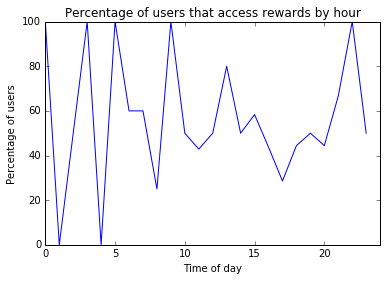

In [5]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
data = []
with open('DeltaDump2015All.txt') as f:
    for line in f:
        data.append(json.loads(line))
d=dict()
for item in data:
    if(item['uid']!="none" and item['uid'] not in d.keys()):
        ud=item['uid']
        c=["No"]
        t=list()
        for time in data:
            if(time['uid']==ud and'id' in time['edata']['eks'].keys()):
                s=time['edata']['eks']['id']
                if("suitcase" in s):
                    c[0]="Yes"
            if(time['uid']==ud):
                t.append(time['ts'])
        sorted(t)
        hr=t[0]
        c.append(int(hr[11:13]))
        d[ud]=c
td=d.values()
rewards=dict()
for tim in td:
    if(tim[0]=="No"):    
        if (tim[1] not in rewards):
            rewards[tim[1]]=[0, 1]
        else:
            rewards[tim[1]][1]+=1
    elif(tim[0]=="Yes"):    
        if (tim[1] not in rewards):
            rewards[tim[1]]=[1, 1]
        else:
            rewards[tim[1]][1]+=1
            rewards[tim[1]][0]+=1
plt.title("Percentage of users that access rewards by hour")
plt.xlabel("Time of day")
plt.ylabel("Percentage of users")
plt.axis([0, 24, 0, 100])
p=list()
for x, y in rewards.values():
    p.append((float(x)/float(y))*100)
plt.plot(rewards.keys(), p)
plt.show()
    